In [1]:
import qcfractal.interface as ptl
client = ptl.FractalClient(address="localhost:7777", verify=False)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%run /home/fastdata/Shared/Masters_Project/My_Classes.ipynb


In [4]:
ds_mols = client.get_collection("OptimizationDataset", "project_molecules")

# optimising CH4, H2CO and C2H2 with the optimisation workflow with 3 different levels of theory & basis sets

- b3lyp-d3bj_def2-svpd
- m06-2x-d3bj_def2-tzvp
- hf-3c-d3bj_MINIX 
- b3lypj_def2-svpd
- m06-2x_def2-tzvp
- hf-3c_MINIX

### set up the molecules and add the specifications 

In [5]:
molecules=['CH4','H2CO','C2H2','CO','CO2','CO2_CO','CO2_CO2','H2O','H2O_H2O']

LoTs=['b3lyp-d3bj_def2-svpd','b3lyp_def2-svpd','hf-3c_MINIX',
      'hf_MINIX','hf-d3bj_sto-3g','hf_sto-3g','mpwb1k-d3bj_def2-tzvp','mpwb1k-d3bj_def2-svpd']

In [6]:

CH4_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'CH4',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    CH4_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(CH4_energies)       


None


None


None


None


None


None


None


None
[-40.49274247427291, -40.49082965381256, -39.93976789065672, -39.937458020425595, -39.7408756035934, -39.72701071606258, -40.496947119041415, -40.45244718425112]


In [7]:
H2CO_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'H2CO',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    H2CO_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(H2CO_energies) 



        

None


None


None


None


None


None


None


None
[-114.42858729584833, -114.42675300794062, -113.11535940293443, -113.07238405306406, -112.36705172674245, -112.35453148153964, -114.49097143769308, -114.36376513664463]


In [8]:
C2H2_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'C2H2',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    C2H2_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(C2H2_energies)      

None


None


None


None


None


None


None


None
[-77.27926622847151, -77.27700169639475, -76.32074591662446, -76.29565933905225, -75.87084705876099, -75.85648896683178, -77.3110919400631, -77.22475554033615]


In [9]:
energies={i:j  for i,j in zip(molecules ,[CH4_energies,H2CO_energies,C2H2_energies])   
}

results_df=pd.DataFrame(energies,index=LoTs)

In [10]:
results_df

,CH4,H2CO,C2H2
b3lyp-d3bj_def2-svpd,-40.492742,-114.428587,-77.279266
b3lyp_def2-svpd,-40.490830,-114.426753,-77.277002
hf-3c_MINIX,-39.939768,-113.115359,-76.320746
hf_MINIX,-39.937458,-113.072384,-76.295659
hf-d3bj_sto-3g,-39.740876,-112.367052,-75.870847
hf_sto-3g,-39.727011,-112.354531,-75.856489
mpwb1k-d3bj_def2-tzvp,-40.496947,-114.490971,-77.311092
mpwb1k-d3bj_def2-svpd,-40.452447,-114.363765,-77.224756


In [11]:
for spec in ds_mols.df.columns:
    for entry in ds_mols.df.index:
        optimisation.restart_job(new_tag='basic_small')

In [211]:
ds_mols  = client.get_collection("OptimizationDataset", "project_molecules")
ds_mols.status(collapse = False)


,blyp-d3bj_def2-svpd,b3lyp-d3bj_def2-svpd,hf-3c-d3bj_MINIX,b3lyp_def2-svpd,hf-3c_MINIX,hf-d3bj_sto-3g,hf_sto-3g,hf_MINIX,mpwb1k-d3bj_def2-tzvp,mpwb1k-d3bj_def2-svpd
NH3,COMPLETE,None,None,None,None,None,None,None,COMPLETE,COMPLETE
CH3OH,COMPLETE,None,None,None,None,None,None,None,COMPLETE,COMPLETE
CO2,None,None,None,None,None,None,None,None,COMPLETE,COMPLETE
CO,None,None,None,None,None,None,None,None,COMPLETE,COMPLETE
CO2_CO,None,None,None,None,None,None,None,None,COMPLETE,COMPLETE
H2O_H2O,None,None,None,None,None,None,None,None,COMPLETE,COMPLETE
H2O,None,None,None,None,None,None,None,None,COMPLETE,COMPLETE
CO2_CO2,None,None,None,None,None,None,None,None,COMPLETE,COMPLETE
CH4,None,None,None,None,None,None,None,None,COMPLETE,COMPLETE
H2CO,None,None,None,None,None,None,None,None,COMPLETE,COMPLETE


In [13]:
#del ds_mols.data.specs['m06-2x_def2-tzvp']
ds_mols.save()

'1028'

In [209]:
ds_mols.compute('mpwb1k-d3bj_def2-svpd', tag= 'basic_small')

2

# dimer of CO2/CO  and H2O (make them on avogadro and then run the optimisation workflow)

In [14]:
CO2_CO_energies=[]
for LoT in LoTs:
    optimisation=workflow(ds_mols,'CO2_CO',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    CO2_CO_energies.append((optimisation.get_results()[1].get_final_energy()))
    
   
    
    

       
print(CO2_CO_energies)       


None


None


None


None


None


None


None


None
[-301.69504844235877, -301.69124966243476, -298.3787771499902, -298.2157791047391, -296.31382973871024, -296.2955806941626, -301.8997054925744, -301.55617064949627]


In [15]:
optimisation.get_results()[1].get_final_molecule()


NGLWidget()

In [16]:
optimisation.get_results()[1].get_final_molecule().measure([0,3])

6.155113308091702

In [17]:
results_df['CO2_CO']=CO2_CO_energies
results_df



,CH4,H2CO,C2H2,CO2_CO
b3lyp-d3bj_def2-svpd,-40.492742,-114.428587,-77.279266,-301.695048
b3lyp_def2-svpd,-40.490830,-114.426753,-77.277002,-301.691250
hf-3c_MINIX,-39.939768,-113.115359,-76.320746,-298.378777
hf_MINIX,-39.937458,-113.072384,-76.295659,-298.215779
hf-d3bj_sto-3g,-39.740876,-112.367052,-75.870847,-296.313830
hf_sto-3g,-39.727011,-112.354531,-75.856489,-296.295581
mpwb1k-d3bj_def2-tzvp,-40.496947,-114.490971,-77.311092,-301.899705
mpwb1k-d3bj_def2-svpd,-40.452447,-114.363765,-77.224756,-301.556171


In [18]:
H2O_H2O_energies=[]
for LoT in LoTs:
    optimisation=workflow(ds_mols,'H2O_H2O',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    H2O_H2O_energies.append((optimisation.get_results()[1].get_final_energy()))
   
    
    

       
print(H2O_H2O_energies) 

None


None


None


None


None


None


None


None
[-152.77110408541793, -152.7689501861874, -151.03437849477197, -151.02106397406703, -149.95411956007644, -149.94140535621887, -152.8528257706319, -152.68635303358323]


In [19]:
optimisation.get_results()[1].get_final_molecule()

NGLWidget()

In [20]:
optimisation.get_results()[1].get_final_molecule().measure([0,4]) #H-bonding length

3.660008903704991

In [21]:
results_df['H2O_H2O']=H2O_H2O_energies
results_df

,CH4,H2CO,C2H2,CO2_CO,H2O_H2O
b3lyp-d3bj_def2-svpd,-40.492742,-114.428587,-77.279266,-301.695048,-152.771104
b3lyp_def2-svpd,-40.490830,-114.426753,-77.277002,-301.691250,-152.768950
hf-3c_MINIX,-39.939768,-113.115359,-76.320746,-298.378777,-151.034378
hf_MINIX,-39.937458,-113.072384,-76.295659,-298.215779,-151.021064
hf-d3bj_sto-3g,-39.740876,-112.367052,-75.870847,-296.313830,-149.954120
hf_sto-3g,-39.727011,-112.354531,-75.856489,-296.295581,-149.941405
mpwb1k-d3bj_def2-tzvp,-40.496947,-114.490971,-77.311092,-301.899705,-152.852826
mpwb1k-d3bj_def2-svpd,-40.452447,-114.363765,-77.224756,-301.556171,-152.686353


In [22]:
H2O_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'H2O',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    H2O_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(H2O_energies)

None


None


None


None


None


None


None


None
[-76.380992037485, -76.38041821745861, -75.51244523398331, -75.50556343833674, -74.970498196384, -74.96599011779216, -76.4218869322801, -76.338891675368]


In [23]:
CO2_CO2_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'CO2_CO2',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    CO2_CO2_energies.append((optimisation.get_results()[1].get_final_energy()))

    
        
print(CO2_CO2_energies)

None


None


None


None


None


None


None


None
[-376.9191057729864, -376.9167931270178, -372.7786458161511, -372.5732862562401, -370.15788975462397, -370.13727469806537, -377.1755406982618, -376.7497663562582]


In [24]:
optimisation.get_results()[1].get_final_molecule()

NGLWidget()

In [25]:
optimisation.get_results()[1].get_final_molecule().measure([4,1,3])

13.336704232681676

- Seems to be that the levels of theories that take dispersion relation into account optimise the geometry in many less steps than their non dispersion factoring counterparts (5 compared to orders of 10). 

In [26]:
CO2_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'CO2',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    CO2_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(CO2_energies)

None


None


None


None


None


None


None


None
[-188.45955362833902, -188.45791077942738, -186.387989673943, -186.28657991485238, -185.07901159425847, -185.06860962171322, -188.58778082478491, -188.37484884133784]


In [27]:
CO_energies=[]

for LoT in LoTs:
    optimisation=workflow(ds_mols,'CO',LoT)
    optimisation.add_specification()
    optimisation.setup_molecule()
    optimisation.compute_molecule('basic_small')
    print(optimisation.get_results()[1].show_history())
    CO_energies.append((optimisation.get_results()[1].get_final_energy()))
  
    
    

       
print(CO_energies)

None


None


None


None


None


None


None


None
[-113.2330814439126, -113.23235369390338, -111.9880232701547, -111.92818807466858, -111.23085656222912, -111.2256238959865, -113.31016966884538, -113.1791705305159]


In [80]:
molecules=['CH4','H2CO','C2H2','CO','CO2','CO2_CO','CO2_CO2','H2O','H2O_H2O']
energies={i:j  for i,j in zip(molecules ,[CH4_energies,H2CO_energies,C2H2_energies,CO_energies,CO2_energies,CO2_CO_energies,CO2_CO2_energies,H2O_energies,H2O_H2O_energies])   
}

results_df=pd.DataFrame(energies,index=LoTs)

In [81]:

results_df

,CH4,H2CO,C2H2,CO,CO2,CO2_CO,CO2_CO2,H2O,H2O_H2O
b3lyp-d3bj_def2-svpd,-4.049274e+01,-1.144286e+02,-7.727927e+01,-1.132331e+02,-1.884596e+02,-3.016950e+02,-3.769191e+02,-7.638099e+01,-1.527711e+02
b3lyp_def2-svpd,-4.049083e+01,-1.144268e+02,-7.727700e+01,-1.132324e+02,-1.884579e+02,-3.016912e+02,-3.769168e+02,-7.638042e+01,-1.527690e+02
hf-3c_MINIX,-3.993977e+01,-1.131154e+02,-7.632075e+01,-1.119880e+02,-1.863880e+02,-2.983788e+02,-3.727786e+02,-7.551245e+01,-1.510344e+02
hf_MINIX,-3.993746e+01,-1.130724e+02,-7.629566e+01,-1.119282e+02,-1.862866e+02,-2.982158e+02,-3.725733e+02,-7.550556e+01,-1.510211e+02
hf-d3bj_sto-3g,-3.974088e+01,-1.123671e+02,-7.587085e+01,-1.112309e+02,-1.850790e+02,-2.963138e+02,-3.701579e+02,-7.497050e+01,-1.499541e+02
hf_sto-3g,-3.972701e+01,-1.123545e+02,-7.585649e+01,-1.112256e+02,-1.850686e+02,-2.962956e+02,-3.701373e+02,-7.496599e+01,-1.499414e+02
mpwb1k-d3bj_def2-tzvp,-4.049695e+01,-1.144910e+02,-7.731109e+01,-1.133102e+02,-1.885878e+02,-3.018997e+02,-3.771755e+02,-7.642189e+01,-1.528528e+02
mpwb1k-d3bj_def2-svpd,-4.045245e+01,-1.143638e+02,-7.722476e+01,-1.131792e+02,-1.883748e+02,-3.015562e+02,-3.767498e+02,-7.633889e+01,-1.526864e+02


# calculating the BE by hand (bovolenta paper)

In [82]:
# ds_mols=client.get_collection('OptimizationDataset', 'c2h2_w12_1')
# ds_mols.status(collapse=False)

In [83]:
def BE(dimer,molecule_1,molecule_2):
    
    return dimer - (molecule_1+molecule_2)

    

In [84]:
results_df['BE_CO2_CO']=BE(results_df['CO2_CO'],results_df['CO2'],results_df['CO'])
results_df['BE_CO2_CO2']=BE(results_df['CO2_CO2'],results_df['CO2'],results_df['CO2'])
results_df['BE_H2O_H2O']=BE(results_df['H2O_H2O'],results_df['H2O'],results_df['H2O'])




In [85]:
#convert from Hatrees to Kelvin (315777.09 K = 1.000000 Ha)

results_df=results_df*315777.09
pd.options.display.float_format = "{:.6e}".format
results_df

,CH4,H2CO,C2H2,CO,CO2,CO2_CO,CO2_CO2,H2O,H2O_H2O,BE_CO2_CO,BE_CO2_CO2,BE_H2O_H2O
b3lyp-d3bj_def2-svpd,-1.278668e+07,-3.613393e+07,-2.440302e+07,-3.575641e+07,-5.951121e+07,-9.526838e+07,-1.190224e+08,-2.411937e+07,-4.824161e+07,-7.620870e+02,4.685158e-01,-2.879890e+03
b3lyp_def2-svpd,-1.278608e+07,-3.613335e+07,-2.440231e+07,-3.575618e+07,-5.951069e+07,-9.526718e+07,-1.190217e+08,-2.411919e+07,-4.824093e+07,-3.111001e+02,-3.067990e+02,-2.562137e+03
hf-3c_MINIX,-1.261206e+07,-3.571924e+07,-2.410034e+07,-3.536325e+07,-5.885706e+07,-9.422118e+07,-1.177150e+08,-2.384510e+07,-4.769320e+07,-8.728729e+02,-8.420096e+02,-2.996101e+03
hf_MINIX,-1.261133e+07,-3.570567e+07,-2.409242e+07,-3.534436e+07,-5.882503e+07,-9.416971e+07,-1.176501e+08,-2.384293e+07,-4.768899e+07,-3.192870e+02,-3.992260e+01,-3.137908e+03
hf-d3bj_sto-3g,-1.254926e+07,-3.548294e+07,-2.395828e+07,-3.512416e+07,-5.844371e+07,-9.356912e+07,-1.168874e+08,-2.367397e+07,-4.735208e+07,-1.250977e+03,4.213537e+01,-4.143996e+03
hf_sto-3g,-1.254488e+07,-3.547899e+07,-2.395374e+07,-3.512250e+07,-5.844043e+07,-9.356336e+07,-1.168809e+08,-2.367254e+07,-4.734806e+07,-4.254075e+02,-1.751130e+01,-2.976237e+03
mpwb1k-d3bj_def2-tzvp,-1.278801e+07,-3.615363e+07,-2.441307e+07,-3.578076e+07,-5.955170e+07,-9.533301e+07,-1.191034e+08,-2.413228e+07,-4.826742e+07,-5.541885e+02,6.615943e+00,-2.858385e+03
mpwb1k-d3bj_def2-svpd,-1.277396e+07,-3.611346e+07,-2.438581e+07,-3.573939e+07,-5.948446e+07,-9.522453e+07,-1.189689e+08,-2.410607e+07,-4.821485e+07,-6.793242e+02,-2.168554e+01,-2.706110e+03


### Scatter Plot of the BEs for each LoT

-646.9055093141466
-147.3385229044484
-3032.595392328316


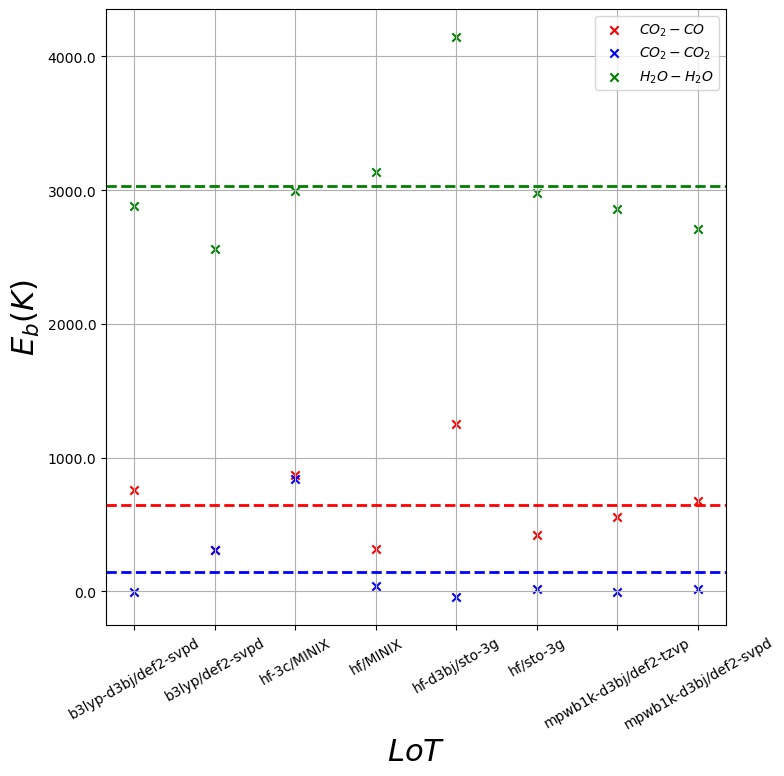

In [86]:
from matplotlib.ticker import FuncFormatter
colours=['red','blue','green']
dimers=['$CO_{2}$']
plt.figure(figsize=(8,8))
plt.grid(True)
# Use FuncFormatter to format the y-axis to 8th order
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e0:.1f}'))



for col,colour in zip(results_df.columns[-3:],colours):
    plt.scatter([f'{i.replace("_","/")}' for i in results_df.index],-results_df[col],label=f"${col.replace('BE_','').replace('_','-').replace('2','_{2}')}$",marker='x',color=colour)
    # Calculate row-wise mean and plot a dashed line for each row
    row_means= results_df[col].mean(axis=0)  # Calculate the mean across each row
    print(row_means)
    # Plot dashed lines for the mean of each row
    plt.axhline(y=-row_means, color=colour, linestyle='--', 
                #label=f'Avg {col.replace("BE_","")}={round(row_means,3)}'
                 linewidth=2)
    # Add a label near the reference line
    #plt.text(x=0, y=row_means, s=f'{row_means:.3e}', #color='green',
    #         verticalalignment='top', horizontalalignment='center', fontsize=10)


    
 
# Enable minor ticks and add minor ticks between major ticks
#plt.minorticks_on()




# Customize minor ticks on the y-axis only
plt.tick_params(axis='y', which='minor', direction='out', length=4, width=1, colors='gray', grid_color='gray', grid_alpha=0.3)
# Customize the x-axis labels: Decrease font size and rotate 30 degrees clockwise
plt.xticks(fontsize=10, rotation=30)
plt.xlabel('$LoT$',fontsize=22)
plt.ylabel('$E_{b} (K)$',fontsize=22)
plt.legend()
    

### Bar graph of each constituent BE to see problem with scatter plot

#### For H2O + H2O -> (H2O)2

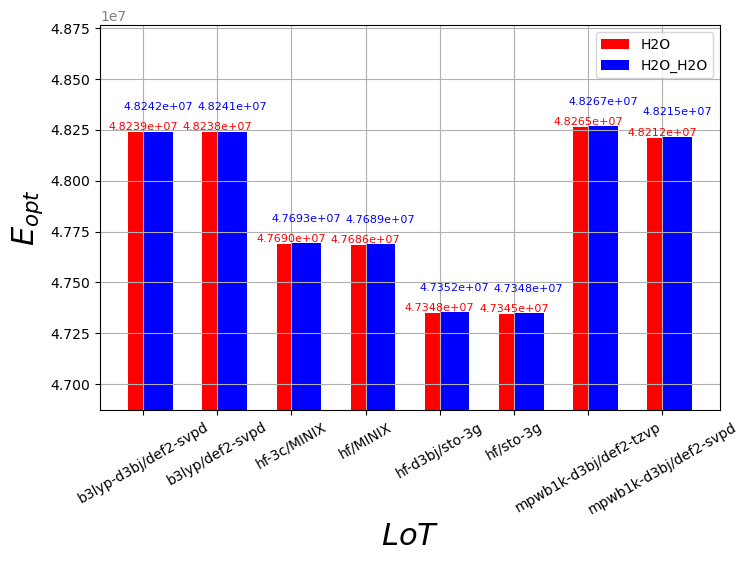

In [35]:
from matplotlib.ticker import FuncFormatter,ScalarFormatter

colours=['red','blue']
columns=['H2O','H2O_H2O']


# Zoom into the range of values to highlight differences
max_value = -(2*results_df['H2O'].max())
zoom_range=max_value*0.99

    
# Define the x-axis positions and bar width
categories = [f'{i.replace("_","/")}' for i in results_df.index]
x = np.arange(len(categories))  # Positions for categories
width = 0.4  # Width of each bar


#for category in categories[a:b]:
# Create the grouped bar graph
fig, ax = plt.subplots(figsize=(8, 5))
plt.grid(True)
bar1 = ax.bar(categories, -2*results_df['H2O'], width, label='H2O', color='red')
bar2 = ax.bar(x + width/2, -results_df['H2O_H2O'], width, label='H2O_H2O', color='blue')

for bar in bar1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        height,                             # Y-coordinate (top of bar)
        f'{height:.4e}',                    # Text label (formatted to 2 decimals)
        ha='center', va='bottom', fontsize=8, color='red'
    )
    
for bar in bar2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        1.002*height,                             # Y-coordinate (top of bar)
        f'{height:.4e}',                    # Text label (formatted to 2 decimals)
        ha='center', va='bottom', fontsize=8, color='blue'
    )


# Customize minor ticks on the y-axis only
plt.tick_params(axis='y', which='minor', direction='out', length=4, width=1, colors='gray', grid_color='gray', grid_alpha=0.3)
# Customize the x-axis labels: Decrease font size and rotate 30 degrees clockwise
plt.xticks(fontsize=10, rotation=30)
plt.xlabel('$LoT$',fontsize=22)
plt.ylabel('$E_{opt}$',fontsize=22)
# Set y-axis limits to zoom in on top 5%
plt.ylim(zoom_range, max_value*1.03)

plt.legend()
plt.show()
   
 
    

#### For CO2 + CO2 -> (CO2)2

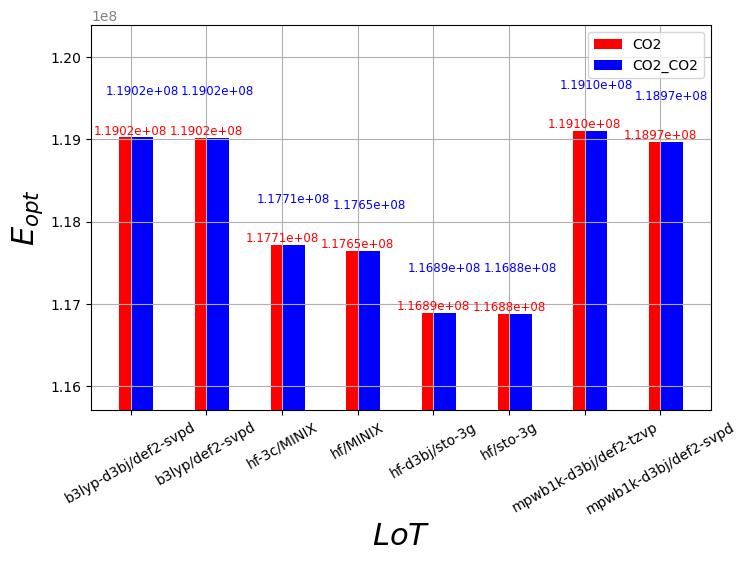

In [36]:
from matplotlib.ticker import FuncFormatter

colours=['red','blue']
columns=['CO2','CO2_CO2']

max_value= -2*results_df['CO2'].max()
zoom_range = max_value *0.99
    
# Define the x-axis positions and bar width
categories = [f'{i.replace("_","/")}' for i in results_df.index]
x = np.arange(len(categories))  # Positions for categories
width = 0.3  # Width of each bar

# Create the grouped bar graph
fig, ax = plt.subplots(figsize=(8, 5))
plt.grid(True)
bar1 = ax.bar(categories, -2*results_df['CO2'], width, label='CO2', color='red')
bar2 = ax.bar(x + width/2, -results_df['CO2_CO2'], width, label='CO2_CO2', color='blue')

for bar in bar1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        height,                             # Y-coordinate (top of bar)
        f'{height:.4e}',                    # Text label (formatted to 2 decimals)
        ha='center', va='bottom', fontsize=8.5, color='red'
    )
    
for bar in bar2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        1.004*height,                             # Y-coordinate (top of bar)
        f'{height:.4e}',                    # Text label (formatted to 2 decimals)
        ha='center', va='bottom', fontsize=8.5, color='blue'
    )

# Customize minor ticks on the y-axis only
plt.tick_params(axis='y', which='minor', direction='out', length=4, width=1, colors='gray', grid_color='gray', grid_alpha=0.3)
# Customize the x-axis labels: Decrease font size and rotate 30 degrees clockwise
plt.xticks(fontsize=10, rotation=30)
plt.xlabel('$LoT$',fontsize=22)
plt.ylabel('$E_{opt}$',fontsize=22)
# Set y-axis limits to zoom in on top 5%
plt.ylim(zoom_range, max_value*1.03)

plt.legend()
plt.show()
    

#### For CO + CO2 ->  CO-CO2

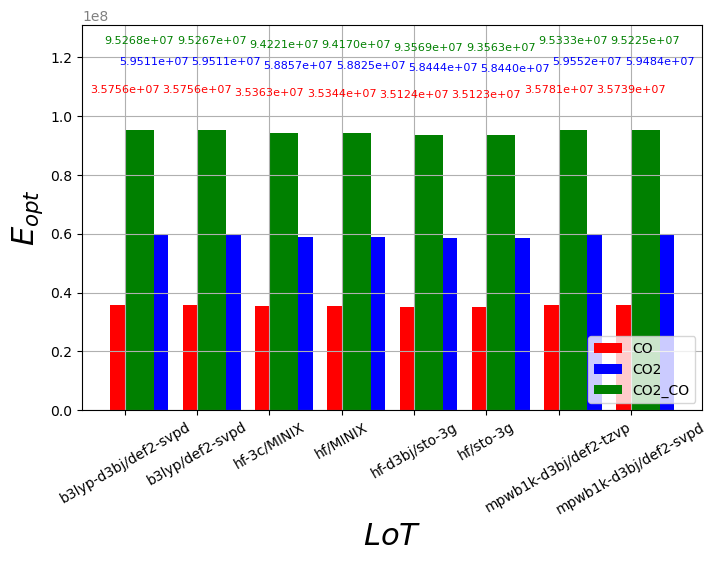

In [97]:
from matplotlib.ticker import FuncFormatter

colours=['red','blue','green']
columns=['CO','CO2','CO2_CO']

max_value= -results_df['CO2_CO'].max()
zoom_range = max_value *0.99
    
# Define the x-axis positions and bar width
categories = [f'{i.replace("_","/")}' for i in results_df.index]
x = np.arange(len(categories))  # Positions for categories
width = 0.4  # Width of each bar

# Create the grouped bar graph
fig, ax = plt.subplots(figsize=(8, 5))
plt.grid(True)
bar1 = ax.bar(categories, -results_df['CO'], width, label='CO', color='red')
bar2 = ax.bar(x + width, -results_df['CO2'], width, label='CO2', color='blue')
bar3 = ax.bar(x+width/2, -results_df['CO2_CO'], width, label='CO2_CO', color='green')


for bar in bar1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        3*height,                             # Y-coordinate (top of bar)
        f'{height:.4e}',                    # Text label (formatted to 2 decimals)
        ha='center', va='bottom', fontsize=8, color='red'
    )
    
for bar in bar2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        1.96*height,                             # Y-coordinate (top of bar)
        f'{height:.4e}',                    # Text label (formatted to 2 decimals)
        ha='center', va='bottom', fontsize=8, color='blue'
    )


for bar in bar3:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
        1.3*height,                             # Y-coordinate (top of bar)
        f'{height:.4e}',                    # Text label (formatted to 2 decimals)
        ha='center', va='bottom', fontsize=8, color='green'
    )
    

# Customize minor ticks on the y-axis only
plt.tick_params(axis='y', which='minor', direction='out', length=4, width=1, colors='gray', grid_color='gray', grid_alpha=0.3)
# Customize the x-axis labels: Decrease font size and rotate 30 degrees clockwise
plt.xticks(fontsize=10, rotation=30)
plt.xlabel('$LoT$',fontsize=22)
plt.ylabel('$E_{opt}$',fontsize=22)
# Set y-axis limits to zoom in on top 5%
plt.ylim(0, max_value*1.4)

plt.legend(loc='lower right')
plt.show()
    

 ## Checking the status of the sampling of H20 on CD

#### For H2O on (CO2)2

In [38]:
pd.set_option('display.max_rows', None)  
client.list_collections('OptimizationDataset','')
                                         

    

tagline
collection          name                        
OptimizationDataset CH4_cd2_01              None
                    H2O_cd1_01              None
                    H2O_cd2_01              None
                    H2O_cd3_01              None
                    H2O_cd3_02              None
                    c2h2_w12_1              None
                    c2h2_w12_10             None
                    c2h2_w12_11             None
                    c2h2_w12_12             None
                    c2h2_w12_14             None
                    c2h2_w12_15             None
                    c2h2_w12_16             None
                    c2h2_w12_17             None
                    c2h2_w12_18             None
                    c2h2_w12_19             None
                    c2h2_w12_2              None
                    c2h2_w12_3              None
                    c2h2_w12_4              None
                    c2h2_w12_5              None
                    c2h2_w12_6              None
                    ch2_w12_1               None
                    ch2_w12_10              None
                    ch2_w12_11              None
                    ch2_w12_12              None
                    ch2_w12_14              None
                    ch2_w12_15              None
                    ch2_w12_16              None
                    ch2_w12_17              None
                    ch2_w12_18              None
                    ch2_w12_19              None
                    ch2_w12_2               None
                    ch2_w12_20              None
                    ch2_w12_3               None
                    ch2_w12_5               None
                    ch2_w12_6               None
                    ch2o_w12_1              None
                    ch2o_w12_10             None
                    ch2o_w12_11             None
                    ch2o_w12_12             None
                    ch2o_w12_14             None
                    ch2o_w12_15             None
                    ch2o_w12_16             None
                    ch2o_w12_17             None
                    ch2o_w12_18             None
                    ch2o_w12_19             None
                    ch2o_w12_2              None
                    ch2o_w12_3              None
                    ch2o_w12_4              None
                    ch2o_w12_5              None
                    ch2o_w12_6              None
                    ch2oh_w12_1             None
                    ch2oh_w12_10            None
                    ch2oh_w12_11            None
                    ch2oh_w12_12            None
                    ch2oh_w12_14            None
                    ch2oh_w12_15            None
                    ch2oh_w12_16            None
                    ch2oh_w12_2             None
                    ch2oh_w12_3             None
                    ch2oh_w12_4             None
                    ch2oh_w12_5             None
                    ch2oh_w12_6             None
                    ch3_w12_1               None
                    ch3_w12_10              None
                    ch3_w12_11              None
                    ch3_w12_12              None
                    ch3_w12_14              None
                    ch3_w12_15              None
                    ch3_w12_16              None
                    ch3_w12_17              None
                    ch3_w12_18              None
                    ch3_w12_2               None
                    ch3_w12_3               None
                    ch3_w12_4               None
                    ch3_w12_5               None
                    ch3_w12_6               None
                    ch3o_m6_01              None
                    ch3o_m6_02              None
                    ch3o_m7_01              None
                    ch3o_m7_02              None
                    ch3

In [177]:
#checking status of the sampling job for H2O_cd
ds_opt=client.get_collection("OptimizationDataset", "H2O_cd2_01")
ds_opt.status(collapse=False)

,mpwb1k-d3bj_def2-tzvp
H2O_cd2_01_0001,COMPLETE
H2O_cd2_01_0002,COMPLETE
H2O_cd2_01_0004,COMPLETE
H2O_cd2_01_0007,COMPLETE
H2O_cd2_01_0008,COMPLETE
H2O_cd2_01_0009,COMPLETE


In [178]:
for i in ds_opt.status(collapse=False).index:
    r=ds_opt.get_record(i,'mpwb1k-d3bj_def2-tzvp')
    print(r.show_history())
    print(r.get_final_energy())

None
-453.6084975062952


None
-453.59955750213925


None
-453.6048732933032


None
-453.6076859820098


None
-453.5994121816944


None
-453.59955109673353


In [179]:
r=ds_opt.get_record('H2O_cd2_01_0001','mpwb1k-d3bj_def2-tzvp')
r.get_molecular_trajectory()[9]

NGLWidget()

In [183]:
print(r.get_molecular_trajectory()[9].measure([0,6]))
r.get_molecular_trajectory()[9].measure([3,6])

5.237473904480155


5.3549576020160154

In [43]:
r.get_final_energy()

-453.6084975062952

In [44]:
r=ds_opt.get_record('H2O_cd2_01_0002','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

In [45]:
r.get_final_energy()

-453.59955750213925

In [46]:
r=ds_opt.get_record('H2O_cd2_01_0004','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

In [47]:
r=ds_opt.get_record('H2O_cd2_01_0007','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

In [48]:
r=ds_opt.get_record('H2O_cd2_01_0008','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

In [49]:
r=ds_opt.get_record('H2O_cd2_01_0009','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

#### For H2O on CO2

In [186]:
#checking status of the sampling job for H2O_cd
ds_opt=client.get_collection("OptimizationDataset", "H2O_cd1_01")
ds_opt.status(collapse=False)

,mpwb1k-d3bj_def2-tzvp
H2O_cd1_01_0001,COMPLETE
H2O_cd1_01_0006,COMPLETE


In [187]:
for i in ds_opt.status(collapse=False).index:
    r=ds_opt.get_record(i,'mpwb1k-d3bj_def2-tzvp')
    print(r.show_history())
    print(r.get_final_energy())

None
-265.0147751345282


None
-265.0123922037423


In [188]:
r=ds_opt.get_record('H2O_cd1_01_0001','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

In [189]:
r=ds_opt.get_record('H2O_cd1_01_0006','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

#### For H2O on (CO2)3 (barrel)

In [190]:
ds_opt=client.get_collection("OptimizationDataset", "H2O_cd3_01")
ds_opt.status(collapse=False)

,mpwb1k-d3bj_def2-tzvp
H2O_cd3_01_0001,COMPLETE
H2O_cd3_01_0004,COMPLETE
H2O_cd3_01_0006,COMPLETE
H2O_cd3_01_0008,ERROR


In [191]:
for i in ds_opt.status(collapse=False).index:
    r=ds_opt.get_record(i,'mpwb1k-d3bj_def2-tzvp')
    print(r.show_history())
    print(r.get_final_energy())

None
-642.1986831499128


None
-642.2029272324071


None
-642.1961178757936


TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [193]:
r=ds_opt.get_record('H2O_cd3_01_0001','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

In [194]:
r=ds_opt.get_record('H2O_cd3_01_0004','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

In [195]:
r=ds_opt.get_record('H2O_cd3_01_0006','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

#### For H2O on (CO2)3 (cyclic)

In [198]:
ds_opt=client.get_collection("OptimizationDataset", "H2O_cd3_02")
ds_opt.status(collapse=False)

,mpwb1k-d3bj_def2-tzvp
H2O_cd3_02_0001,COMPLETE
H2O_cd3_02_0004,COMPLETE
H2O_cd3_02_0005,COMPLETE
H2O_cd3_02_0006,COMPLETE
H2O_cd3_02_0007,COMPLETE
H2O_cd3_02_0008,ERROR
H2O_cd3_02_0009,ERROR


In [199]:
for i in ds_opt.status(collapse=False).index:
    r=ds_opt.get_record(i,'mpwb1k-d3bj_def2-tzvp')
    print(r.show_history())
    print(r.get_final_energy())

None
-642.2001879239015


None
-642.1909890921257


None
-642.2029523200187


None
-642.1936300530496


None
-642.2020187070324


TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [200]:
r=ds_opt.get_record('H2O_cd3_02_0001','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

In [201]:
r=ds_opt.get_record('H2O_cd3_02_0004','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

In [202]:
r=ds_opt.get_record('H2O_cd3_02_0005','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()

NGLWidget()

In [203]:
r=ds_opt.get_record('H2O_cd3_02_0006','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()
r.

NGLWidget()

In [204]:
r=ds_opt.get_record('H2O_cd3_02_0007','mpwb1k-d3bj_def2-tzvp')
r.get_final_molecule()


SyntaxError: invalid syntax (3912128820.py, line 3)

      Binding         Value
0  H2O_cd1_01 -8.368522e+07
1  H2O_cd2_01 -1.432375e+08
2  H2O_cd3_01 -2.027918e+08
3  H2O_cd3_02 -2.027914e+08


Text(0, 0.5, 'Mean Energy (K)')

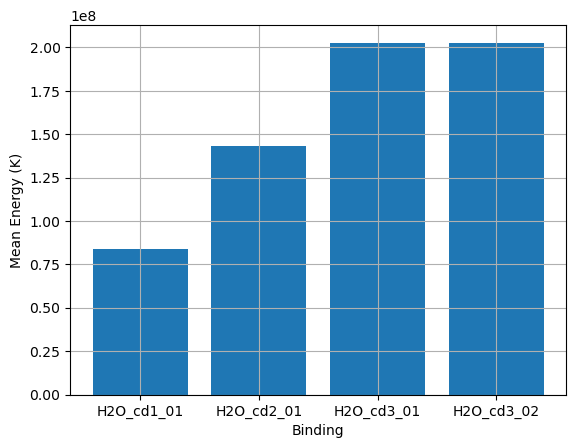

In [205]:
from itertools import groupby
H2O_binding = ['H2O_cd1_01','H2O_cd2_01','H2O_cd3_01','H2O_cd3_02']
lists=[]
for i in H2O_binding:
    ds_opt=client.get_collection("OptimizationDataset", i)
    r=ds_opt.status(collapse=False)
    for j in r.iterrows():
        if j[1][0]=='COMPLETE':
            s=ds_opt.get_record(j[0],'mpwb1k-d3bj_def2-tzvp')
            lists.append([s.get_final_energy()*315777.09,i])
            
            



# Convert to DataFrame
df = pd.DataFrame(lists, columns=['Value', 'Binding'])

# Group by 'Group' column and compute the average
grouped_avg = df.groupby('Binding').mean().reset_index()

# Output the result
print(grouped_avg)
plt.figure()
plt.grid()
plt.bar(df['Binding'],-df['Value'])
plt.xlabel('Binding')
plt.ylabel('Mean Energy (K)')

    
    
    
            
        
        
         
    

 ## Checking the status of the sampling of CH4 on CD

In [217]:
pd.set_option('display.max_rows', None) 
 
client.list_collections('OptimizationDataset',"")

tagline
collection          name                        
OptimizationDataset CH4_cd2_01              None
                    CH4_cd3_01              None
                    CH4_cd3_02              None
                    H2O_cd1_01              None
                    H2O_cd2_01              None
                    H2O_cd3_01              None
                    H2O_cd3_02              None
                    c2h2_w12_1              None
                    c2h2_w12_10             None
                    c2h2_w12_11             None
                    c2h2_w12_12             None
                    c2h2_w12_14             None
                    c2h2_w12_15             None
                    c2h2_w12_16             None
                    c2h2_w12_17             None
                    c2h2_w12_18             None
                    c2h2_w12_19             None
                    c2h2_w12_2              None
                    c2h2_w12_3              None
                    c2h2_w12_4              None
                    c2h2_w12_5              None
                    c2h2_w12_6              None
                    ch2_w12_1               None
                    ch2_w12_10              None
                    ch2_w12_11              None
                    ch2_w12_12              None
                    ch2_w12_14              None
                    ch2_w12_15              None
                    ch2_w12_16              None
                    ch2_w12_17              None
                    ch2_w12_18              None
                    ch2_w12_19              None
                    ch2_w12_2               None
                    ch2_w12_20              None
                    ch2_w12_3               None
                    ch2_w12_5               None
                    ch2_w12_6               None
                    ch2o_w12_1              None
                    ch2o_w12_10             None
                    ch2o_w12_11             None
                    ch2o_w12_12             None
                    ch2o_w12_14             None
                    ch2o_w12_15             None
                    ch2o_w12_16             None
                    ch2o_w12_17             None
                    ch2o_w12_18             None
                    ch2o_w12_19             None
                    ch2o_w12_2              None
                    ch2o_w12_3              None
                    ch2o_w12_4              None
                    ch2o_w12_5              None
                    ch2o_w12_6              None
                    ch2oh_w12_1             None
                    ch2oh_w12_10            None
                    ch2oh_w12_11            None
                    ch2oh_w12_12            None
                    ch2oh_w12_14            None
                    ch2oh_w12_15            None
                    ch2oh_w12_16            None
                    ch2oh_w12_2             None
                    ch2oh_w12_3             None
                    ch2oh_w12_4             None
                    ch2oh_w12_5             None
                    ch2oh_w12_6             None
                    ch3_w12_1               None
                    ch3_w12_10              None
                    ch3_w12_11              None
                    ch3_w12_12              None
                    ch3_w12_14              None
                    ch3_w12_15              None
                    ch3_w12_16              None
                    ch3_w12_17              None
                    ch3_w12_18              None
                    ch3_w12_2               None
                    ch3_w12_3               None
                    ch3_w12_4               None
                    ch3_w12_5               None
                    ch3_w12_6               None
                    ch3o_m6_01              None
                    ch3o_m6_02              None
                    ch3

In [218]:
ds_opt=client.get_collection("OptimizationDataset", "CH4_cd3_01")
ds_opt.status(collapse=False)

,mpwb1k-d3bj_def2-tzvp
CH4_cd3_01_0001,INCOMPLETE
CH4_cd3_01_0002,INCOMPLETE
CH4_cd3_01_0003,INCOMPLETE
CH4_cd3_01_0004,INCOMPLETE
CH4_cd3_01_0006,INCOMPLETE
CH4_cd3_01_0007,INCOMPLETE
CH4_cd3_01_0008,INCOMPLETE
CH4_cd3_01_0009,INCOMPLETE


In [68]:
for i in ds_opt.status(collapse=False).index [1:]:
    r=ds_opt.get_record(i,'mpwb1k-d3bj_def2-svpd')
    print(r.show_history())
    print(r.get_final_energy())

KeyError: "Specification 'mpwb1k-d3bj_def2-svpd' not found."